In [ ]:
# visualizacion post y pre procesamiento del numeor de palabras por documento en cada uno de los corpus
# seleccionando o no nombres propios. 

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import find

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
news_tfidf = pd.read_csv(r"D:\TFG\tfg_git\data\tf_idf\news_processed_tfidf_fulldataset.csv")
mails_tfidf = pd.read_csv(r"D:\TFG\tfg_git\data\tf_idf\mails_processed_tfidf_fulldataset.csv")

In [21]:

feature_names = news_tfidf.columns.tolist()

# loop through each row of the matrix and create a list of words for that row
word_lists = []
for row in range(news_tfidf.shape[0]):
    # get the indices of the non-zero elements in the row
    _, col_indices, _ = find(news_tfidf.iloc[row])
    # create a list of words for the row
    words = [feature_names[col] for col in col_indices]
    word_lists.append(words)

word_lists_news = word_lists

In [22]:

feature_names = mails_tfidf.columns.tolist()

# loop through each row of the matrix and create a list of words for that row
word_lists = []
for row in range(mails_tfidf.shape[0]):
    # get the indices of the non-zero elements in the row
    _, col_indices, _ = find(mails_tfidf.iloc[row])
    # create a list of words for the row
    words = [feature_names[col] for col in col_indices]
    word_lists.append(words)

word_lists_mails = word_lists

In [23]:
print(len(word_lists_news))
print(len(word_lists_mails))

26244
662


In [24]:
# processed tf idf without proper nouns

In [25]:
news_tfidf2 = pd.read_csv(r"D:\TFG\tfg_git\data\tf_idf\news_processed_tfidfv2_fulldataset.csv")
mails_tfidf2 = pd.read_csv(r"D:\TFG\tfg_git\data\tf_idf\mails_processed_tfidfv2_fulldataset.csv")

In [26]:

feature_names = news_tfidf2.columns.tolist()

# loop through each row of the matrix and create a list of words for that row
word_lists2 = []
for row in range(news_tfidf2.shape[0]):
    # get the indices of the non-zero elements in the row
    _, col_indices, _ = find(news_tfidf2.iloc[row])
    # create a list of words for the row
    words = [feature_names[col] for col in col_indices]
    word_lists2.append(words)

word_lists_news2 = word_lists2



feature_names = mails_tfidf2.columns.tolist()

# loop through each row of the matrix and create a list of words for that row
word_lists2 = []
for row in range(mails_tfidf2.shape[0]):
    # get the indices of the non-zero elements in the row
    _, col_indices, _ = find(mails_tfidf2.iloc[row])
    # create a list of words for the row
    words = [feature_names[col] for col in col_indices]
    word_lists2.append(words)

word_lists_mails2 = word_lists2


In [27]:
len(word_lists_news2)

26252

In [39]:
# load preprocessing data
news_preprocessed = pd.read_csv(r"D:\TFG\tfg_git\data\news\news3_v2.csv")
mails_preprocessed = pd.read_csv(r"D:\TFG\tfg_git\data\mails\corpus_v2.0.csv")


In [40]:
len_news_orig = []
len_news_processed = []
len_news_processed2 = []
for i in range(len(word_lists_news)): 
    len_news_processed.append(len(word_lists_news[i]))
    

    
for i in range(len(word_lists_news2)): 
    len_news_processed2.append(len(word_lists_news2[i]))
    
for i in range(len(news_preprocessed)): 
    len_news_orig.append(len(news_preprocessed["clean_text"][i].split()))


In [41]:
len_mails_orig = []
len_mails_processed = []
len_mails_processed2 = []
    
for i in range(len(word_lists_mails)): 
    len_mails_processed.append(len(word_lists_mails[i]))
    

    
for i in range(len(word_lists_mails2)): 
    len_mails_processed2.append(len(word_lists_mails2[i]))
    
for i in range(len(mails_preprocessed)): 
    len_mails_orig.append(len(mails_preprocessed["clean_text"][i].split()))


In [42]:
print(len(len_news_orig))
print(len(len_news_processed))
print(len(len_news_processed2))


### 
print(len(len_mails_orig))
print(len(len_mails_processed))
print(len(len_mails_processed2))

26501
26244
26252
668
662
662


In [43]:
# len_news_orig, len_news_processed, len_news_processed2
# len_mails_orig, len_mails_processed, len_mails_processed2

In [49]:
import numpy as np
from scipy import stats

def stats_from_list(lista):
    # Cálculo de las estadísticas básicas
    minimo = np.min(lista)
    maximo = np.max(lista)
    media = np.mean(lista)
    mediana = np.median(lista)
    percentil_25 = np.percentile(lista, 25)
    percentil_75 = np.percentile(lista, 75)
    ric = percentil_75 - percentil_25
    moda = stats.mode(lista).mode[0]
    
    estadisticas = [minimo,maximo, media, mediana, percentil_25, percentil_75, ric, moda]
    
    return estadisticas


In [50]:
#noticias
stats_len_news_orig = stats_from_list(len_news_orig)
stats_len_news_processed = stats_from_list(len_news_processed)
stats_len_news_processed2 = stats_from_list(len_news_processed2)

# mails

stats_len_mails_orig = stats_from_list(len_mails_orig)
stats_len_mails_processed = stats_from_list(len_mails_processed)
stats_len_mails_processed2 = stats_from_list(len_mails_processed2)


C:\Users\User\AppData\Local\Temp\ipykernel_9148\2835630530.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(lista).mode[0]


In [51]:
full_lists_news = [stats_len_news_orig, stats_len_news_processed, stats_len_news_processed2]
nombres_columnas = ['minimo', 'maximo', 'media', "mediana", "percentil25", "percentil75", "RIC", "moda"]
df_news = pd.DataFrame(full_lists_news, columns=nombres_columnas)
df_news

,minimo,maximo,media,mediana,percentil25,percentil75,RIC,moda
0,14,17659,1067.948945,838.0,549.0,1215.0,666.0,520
1,42,1383,187.607682,166.0,119.0,228.0,109.0,139
2,23,962,121.067043,109.0,75.0,147.0,72.0,98


In [52]:
full_lists_mails = [stats_len_mails_orig, stats_len_mails_processed, stats_len_mails_processed2]
nombres_columnas = ['minimo', 'maximo', 'media', "mediana", "percentil25", "percentil75", "RIC", "moda"]
df_news = pd.DataFrame(full_lists_news, columns=nombres_columnas)
df_news

,minimo,maximo,media,mediana,percentil25,percentil75,RIC,moda
0,14,17659,1067.948945,838.0,549.0,1215.0,666.0,520
1,42,1383,187.607682,166.0,119.0,228.0,109.0,139
2,23,962,121.067043,109.0,75.0,147.0,72.0,98


In [53]:
print(news_tfidf.shape)
print(news_tfidf2.shape)

(26244, 4198)
(26252, 2653)


In [15]:
len(len_news_processed)

26501

In [16]:
max(len_news_processed)

1378

In [17]:
max(len_news_orig)

17678

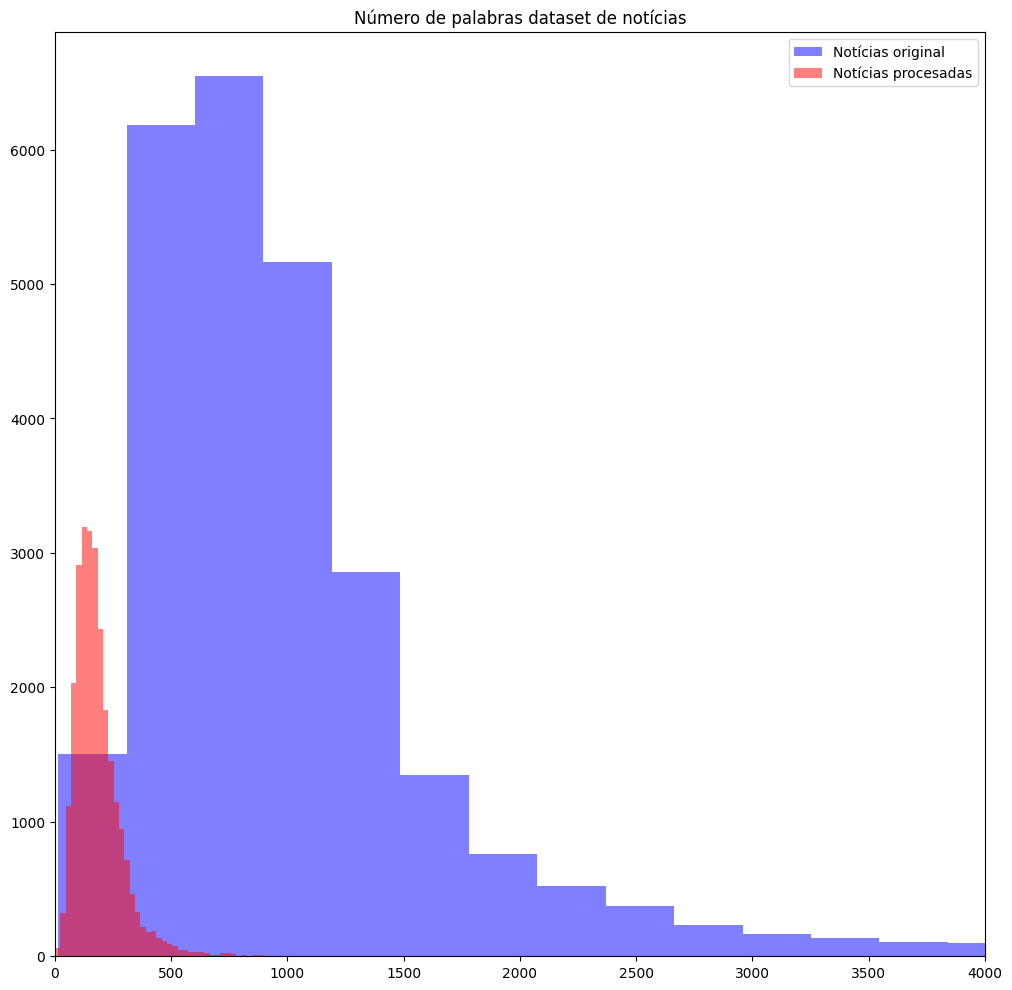

In [11]:
# crear figura y subplot
fig, ax = plt.subplots(figsize=(12, 12))

# trazar el primer histograma
ax.hist(len_news_orig, bins=60, alpha=0.5, label='Notícias original', color='b', histtype='stepfilled')

# trazar el segundo histograma
ax.hist(len_news_processed, bins=60, alpha=0.5, label='Notícias procesadas', color='r', histtype='stepfilled')

# ajustar las etiquetas y títulos
ax.set_title('Número de palabras dataset de notícias')
# establecer límites y ajustar las marcas de graduación en el eje x
# establecer límites y ajustar las marcas de graduación en el eje x
ax.set_xlim(0, 4000)
# agregar leyenda
ax.legend()

# mostrar el gráfico
plt.show()

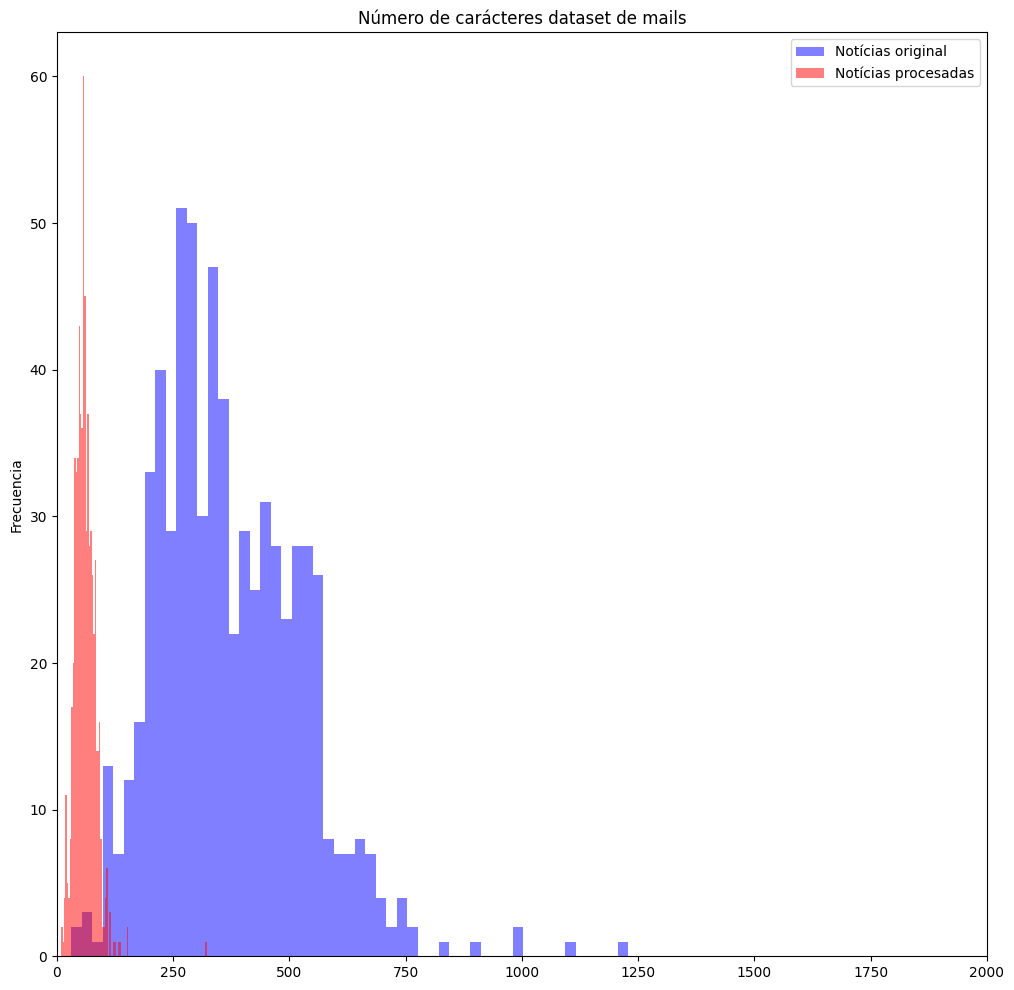

In [13]:
# crear figura y subplot
fig, ax = plt.subplots(figsize=(12, 12))

# trazar el primer histograma
ax.hist(len_mails_orig, bins=100, alpha=0.5, label='Notícias original', color='b', histtype='stepfilled')

# trazar el segundo histograma
ax.hist(len_mails_processed, bins=100, alpha=0.5, label='Notícias procesadas', color='r', histtype='stepfilled')

# ajustar las etiquetas y títulos
ax.set_ylabel('Frecuencia')
ax.set_title('Número de carácteres dataset de mails')
# establecer límites y ajustar las marcas de graduación en el eje x
# establecer límites y ajustar las marcas de graduación en el eje x
ax.set_xlim(0, 2000)
# agregar leyenda
ax.legend()

# mostrar el gráfico
plt.show()